In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('loan_train.csv')
df

In [ ]:
df.shape

(614, 12)

In [ ]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,Male,No,0,Graduate,No,584900,0.0,15000000,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,458300,150800.0,12800000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,300000,0.0,6600000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,258300,235800.0,12000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,600000,0.0,14100000,360.0,1.0,Urban,Y


In [ ]:
df.tail()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
609,Female,No,0,Graduate,No,290000,0.0,7100000,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,410600,0.0,4000000,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,807200,24000.0,25300000,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,758300,0.0,18700000,360.0,1.0,Urban,Y
613,Female,No,0,Graduate,Yes,458300,0.0,13300000,360.0,0.0,Semiurban,N


In [ ]:
df.dtypes

Gender                 object
Married                object
Dependents             object
Education              object
Self_Employed          object
Applicant_Income        int64
Coapplicant_Income    float64
Loan_Amount             int64
Term                  float64
Credit_History        float64
Area                   object
Status                 object
dtype: object

In [ ]:
df['Status'].value_counts()

Status
Y    422
N    192
Name: count, dtype: int64

In [ ]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Applicant_Income', 'Coapplicant_Income', 'Loan_Amount', 'Term',
       'Credit_History', 'Area', 'Status'],
      dtype='object')

In [ ]:
df.isna().sum()

Gender                13
Married                3
Dependents            15
Education              0
Self_Employed         32
Applicant_Income       0
Coapplicant_Income     0
Loan_Amount            0
Term                  14
Credit_History        50
Area                   0
Status                 0
dtype: int64

In [ ]:
df1=df['Gender'].value_counts()
df1


Gender
Male      489
Female    112
Name: count, dtype: int64

<BarContainer object of 2 artists>

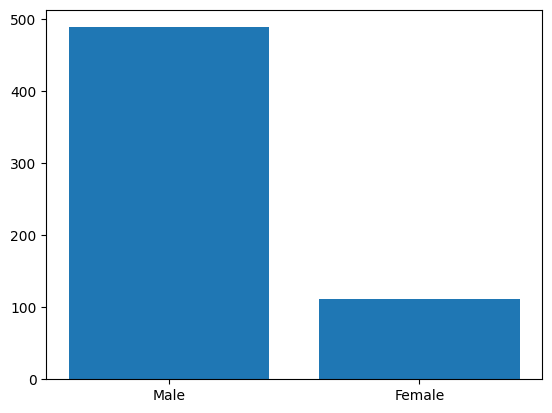

In [ ]:
plt.bar(df1.index,df1.values)

In [ ]:
df2=df['Married'].value_counts()
df2

Married
Yes    398
No     213
Name: count, dtype: int64

<BarContainer object of 2 artists>

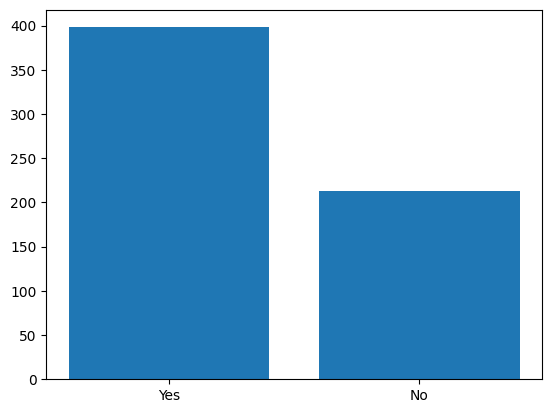

In [ ]:
plt.bar(df2.index,df2.values)

In [ ]:
df3=df['Education'].value_counts()
df3

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64

<BarContainer object of 2 artists>

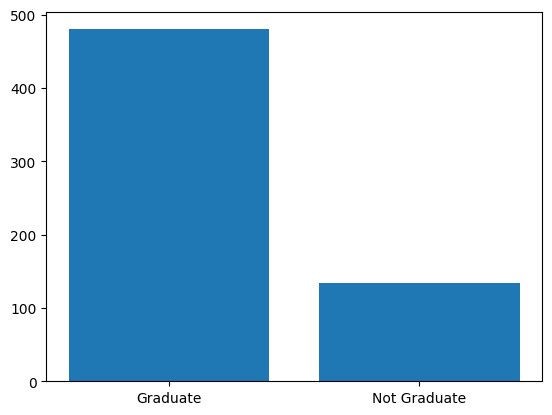

In [ ]:
plt.bar(df3.index,df3.values)

In [ ]:
df4=df['Self_Employed'].value_counts()
df4


Self_Employed
No     500
Yes     82
Name: count, dtype: int64

<BarContainer object of 2 artists>

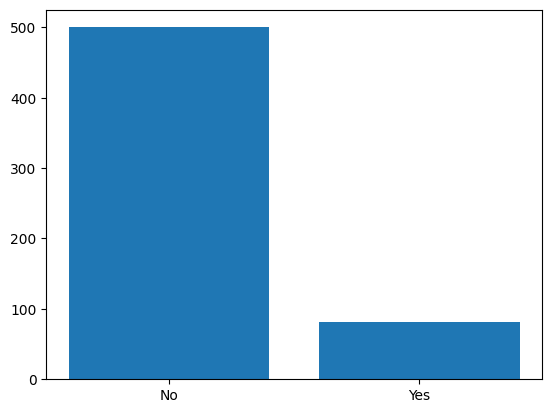

In [ ]:
plt.bar(df4.index,df4.values)

In [ ]:
df5=df['Area'].value_counts()
df5


Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

<BarContainer object of 3 artists>

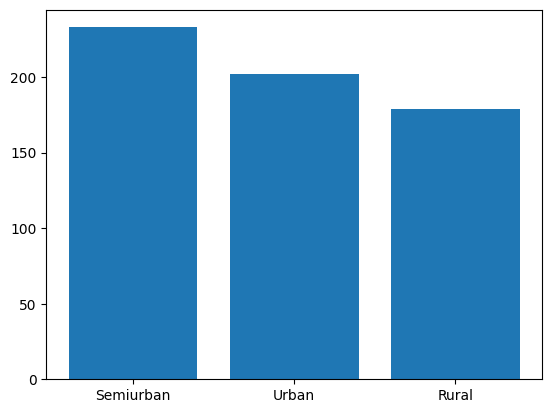

In [ ]:
plt.bar(df5.index,df5.values)

In [ ]:
df6=df['Status'].value_counts()
df6


Status
Y    422
N    192
Name: count, dtype: int64

<BarContainer object of 2 artists>

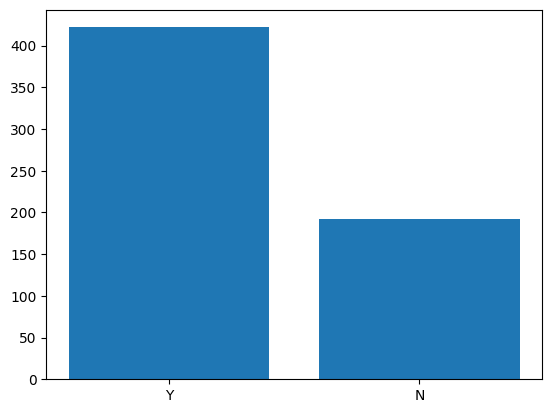

In [ ]:
plt.bar(df6.index,df6.values)

In [ ]:
df['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [ ]:
df['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [ ]:
df['Term'].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [ ]:
df['Credit_History'].unique()

array([ 1.,  0., nan])

In [ ]:
#fill null values
df['Married']=df['Married'].fillna(df['Married'].mode()[0])
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['Term']=df['Term'].fillna(df['Term'].mode()[0])
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mode()[0])

In [ ]:
df.isna().sum()

Gender                13
Married                0
Dependents             0
Education              0
Self_Employed          0
Applicant_Income       0
Coapplicant_Income     0
Loan_Amount            0
Term                   0
Credit_History         0
Area                   0
Status                 0
dtype: int64

In [ ]:
#remove gender column
df.drop(['Gender'],axis=1,inplace=True)

In [ ]:
#encoding
from sklearn.preprocessing import LabelEncoder
lab=LabelEncoder()
df['Married']=lab.fit_transform(df['Married'])
df['Dependents']=lab.fit_transform(df['Dependents'])
df['Education']=lab.fit_transform(df['Education'])
df['Self_Employed']=lab.fit_transform(df['Self_Employed'])
df['Area']=lab.fit_transform(df['Area'])
df

,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,0,0,0,0,584900,0.0,15000000,360.0,1.0,2,Y
1,1,1,0,0,458300,150800.0,12800000,360.0,1.0,0,N
2,1,0,0,1,300000,0.0,6600000,360.0,1.0,2,Y
3,1,0,1,0,258300,235800.0,12000000,360.0,1.0,2,Y
4,0,0,0,0,600000,0.0,14100000,360.0,1.0,2,Y
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,290000,0.0,7100000,360.0,1.0,0,Y
610,1,3,0,0,410600,0.0,4000000,180.0,1.0,0,Y
611,1,1,0,0,807200,24000.0,25300000,360.0,1.0,2,Y
612,1,2,0,0,758300,0.0,18700000,360.0,1.0,2,Y


In [ ]:
#seperate input and output
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [ ]:
#training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
x_train

array([[  1.,   0.,   1., ..., 360.,   0.,   2.],
       [  1.,   0.,   1., ..., 360.,   1.,   0.],
       [  0.,   0.,   0., ..., 360.,   1.,   1.],
       ...,
       [  0.,   0.,   0., ..., 360.,   1.,   2.],
       [  1.,   0.,   0., ..., 240.,   1.,   1.],
       [  1.,   0.,   0., ..., 360.,   1.,   2.]])

In [ ]:
#Normalization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

In [ ]:
#model creation
from sklearn.naive_bayes import BernoulliNB
model=BernoulliNB()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y

In [ ]:
y_test

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'Y', 'Y',
       'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'N', 'N', 'N',
       'N', 'N', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'N', 'N', 'Y', 'N', 'N', 'N', 'Y', 'Y', 'N',
       'N', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N',
       'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y',
       'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N',
       'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'N', 'N', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y

In [ ]:
#Model Performance Evaluation
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[ 27,  38],
       [  2, 118]], dtype=int64)

In [ ]:
#accuracy score
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_pred)
score

0.7837837837837838

In [ ]:
from sklearn.metrics import classification_report
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           N       0.93      0.42      0.57        65
           Y       0.76      0.98      0.86       120

    accuracy                           0.78       185
   macro avg       0.84      0.70      0.71       185
weighted avg       0.82      0.78      0.76       185

